# Assignment 2: Speech Processing in Frequency domain Using Periodogram

### 1. Speech Signal Acquisition:

In [53]:
#import pandas as pd
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
from scipy.signal import periodogram, resample, get_window

In [379]:
import sounddevice as sd
import numpy as np
import scipy.io.wavfile as wav

#Recording parameters
duration = 10  #10 seconds
sample_f = 44100  #Sampling frequency: 44.1 kHz

print("Start recording...")
my_speech = sd.rec(int(duration * sample_f), samplerate=sample_f, channels=1)
sd.wait()  #End of registration
my_speech = my_speech.flatten()  #Converting in 1D array

#Saving audio
wav.write("recording_my_speech.wav", sample_f, my_speech)


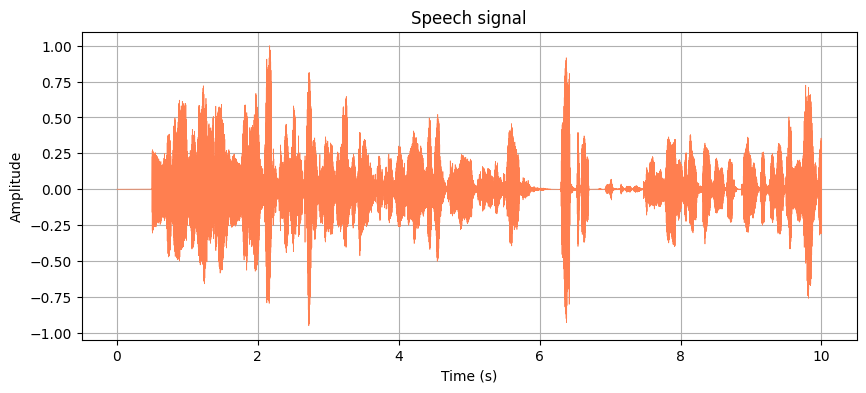

In [123]:
#Take a look
plt.figure(figsize=(10, 4))
plt.plot(np.linspace(0, duration, len(my_speech)), my_speech, color='coral', linewidth=0.5)
plt.title("Speech signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

In [78]:
fs, speech_signal = wav.read('C:/Users/sofyc/OneDrive/Desktop/UPEC/Data capture and processing/assignment 2/recording_my_speech.wav')
#Checking of sampling frequency (fs)
print(f'{fs} Hz')
#44100 Hz = 44.1 kHz
#Nyquist frequency = fs / 2 = 22.05 kHz

44100 Hz


In [79]:
#Take a look at the number of channels
len(speech_signal.shape)

1

### 2. Basic Signal Characteristics:

In [80]:
#Normalization of the signal --> NOT NECESSARY
#signal = signal / np.max(np.abs(signal))

- Duration of the signal (in seconds).

In [81]:
duration = len(speech_signal) / fs
print(f'{duration} s')

10.0 s


- Sampling frequency and number of samples.

In [82]:
print(f'{fs} Hz\n{len(speech_signal)} samples')

44100 Hz
441000 samples


- Mean value (average amplitude) and variance.

In [83]:
mean = np.mean(speech_signal)
variance = np.var(speech_signal)
print(f'mean = {mean:0.8f}\nvariance = {variance:0.4f}')

mean = 0.00001489
variance = 0.0189


- Energy of the signal (sum of the squared values of the samples).

In [84]:
energy = np.sum(speech_signal**2)
print(f'energy = {energy}')

energy = 8333.0263671875


### 3. Frequency Representation (Periodogram):

3.1.1. Compute the Power Spectral Density (PSD) of your speech signal using the periodogram.

In [85]:
#Periodogram
frequencies, psd = periodogram(speech_signal, fs)

#Converting PSD in decibel (dB)
psd_db = 10 * np.log10(psd)

In [86]:
print(f'PSD: {psd}\n\nPSD in dB: {psd_db}')

PSD: [8.52296142e-19 4.59501726e-09 4.68874672e-09 ... 1.00036475e-13
 4.75172236e-14 5.82179324e-13]

PSD in dB: [-180.6941    -83.37714   -83.28943  ... -129.99841  -133.23149
 -122.349434]


3.1.2. Display the frequency spectrum in Hertz (Hz) and the corresponding power in dB.

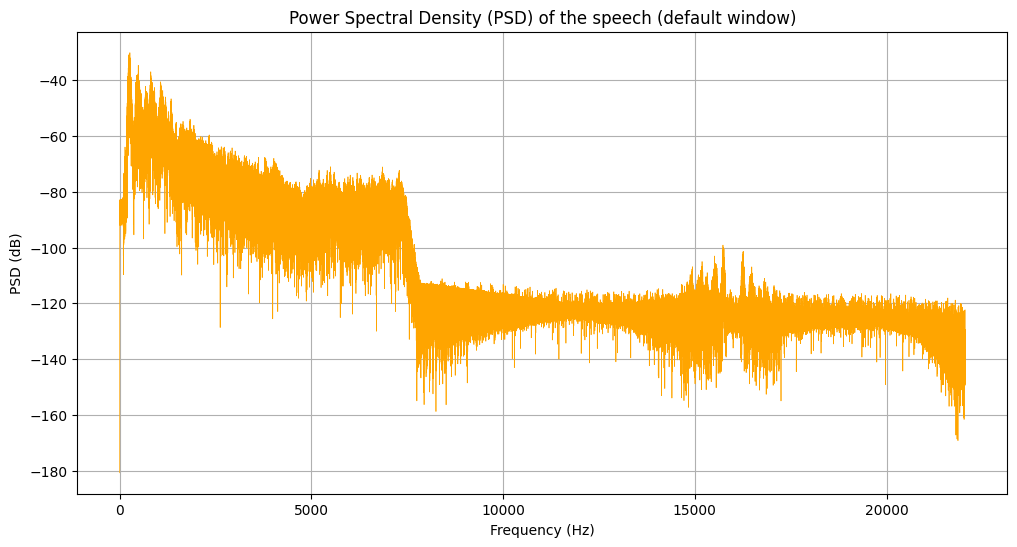

In [128]:
#Plot Periodogram (Rectangular default window: window='boxcar')
plt.figure(figsize=(12, 6))
plt.plot(frequencies, psd_db, color='orange', linewidth=0.5)  #altro comando uguale ma credo usi la psd NON in dB: plt.semilogy(frequencies, psd, color='orange')
plt.title("Power Spectral Density (PSD) of the speech (default window)")
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (dB)')
plt.grid(True)
plt.show()

------------------Calculation of PSD with Welch method (NOT REQUIRED):---------------------------------------------------------

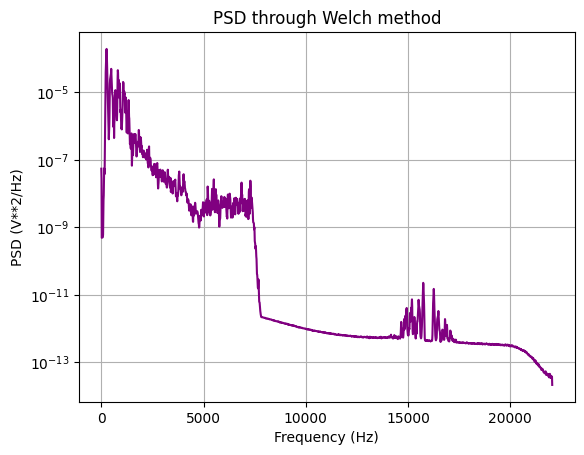

In [88]:
from scipy.signal import welch

#Calculation of PSD through Welch method
freq_welch, psd_welch = welch(speech_signal, fs, nperseg=4*1024)

#Plot
plt.semilogy(freq_welch, psd_welch, color='purple')
#plt.xlim([15000, 18000])
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (V**2/Hz)')
plt.title('PSD through Welch method')
plt.grid(True)
plt.show()

-----------------------------------------                 ----------------------------------         ---------------------------------

3.1.3. Explore the influence of windowing functions (e.g., Hamming, Hanning) on the periodogram and compare the results.

In [89]:
#Periodogram with Hamming window
freq_hamming, psd_hamming = periodogram(speech_signal, fs, window='hamming')

#Periodogram with Hanning window
freq_hanning, psd_hanning = periodogram(speech_signal, fs, window='hann')

#Conversions in decibel (dB)
psd_hamming_db = 10 * np.log10(psd_hamming)
psd_hanning_db = 10 * np.log10(psd_hanning)

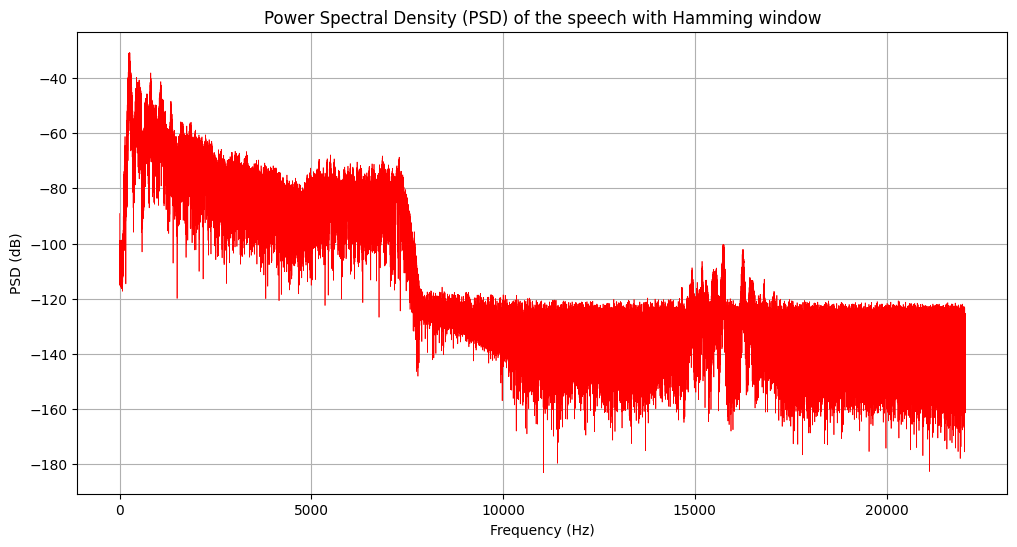

In [106]:
#Plot Periodogram Hamming window
plt.figure(figsize=(12, 6))
plt.plot(freq_hamming, psd_hamming_db, color='red', linewidth=0.5)
plt.title("Power Spectral Density (PSD) of the speech with Hamming window")
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (dB)')
plt.grid(True)
plt.show()

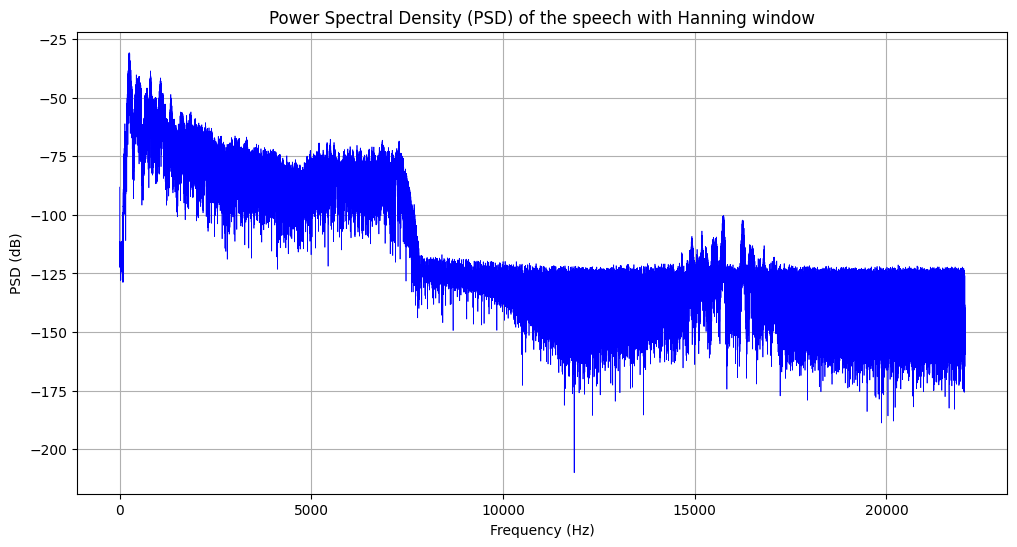

In [125]:
#Plot Periodogram Hanning window
plt.figure(figsize=(12, 6))
plt.plot(freq_hanning, psd_hanning_db, color='blue', linewidth=0.5)
plt.title("Power Spectral Density (PSD) of the speech with Hanning window")
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (dB)')
plt.grid(True)
plt.show()

Now we can make a final plot with the three windows we analyzed, to have a better perceptiona about their differences:
- Rectangular window of default,
- Hamming window,
- Hanning window.

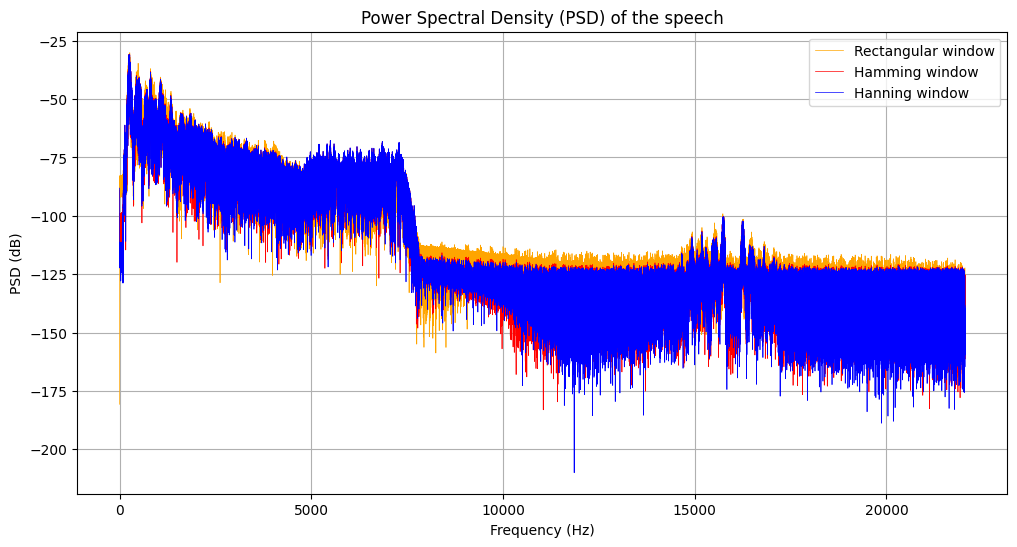

In [127]:
#Plot Periodogram Complexive
plt.figure(figsize=(12, 6))
plt.plot(frequencies, psd_db, color='orange', label='Rectangular window', linewidth=0.5)
plt.plot(freq_hamming, psd_hamming_db, color='red', label='Hamming window', linewidth=0.5)
plt.plot(freq_hanning, psd_hanning_db, color='blue', label='Hanning window', linewidth=0.5)
plt.title("Power Spectral Density (PSD) of the speech")
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (dB)')
plt.legend()
plt.grid(True)
plt.show()

3.2. Analysis of spectum for: 

3.2.1. The presence of **dominant frequencies** and their possible relation to speech formants (vocal resonances).

In [132]:
#Dominant frequencies
three_dom_idx = np.argsort(psd)[-3:][::-1]
freq_dominant_3 = frequencies[three_dom_idx]

for i in range(3):
    print(f"Dominant frequency {i+1}: {freq_dominant_3[i]:.2f} Hz")


Dominant frequency 1: 265.90 Hz
Dominant frequency 2: 265.80 Hz
Dominant frequency 3: 256.30 Hz


<Figure size 1200x600 with 0 Axes>

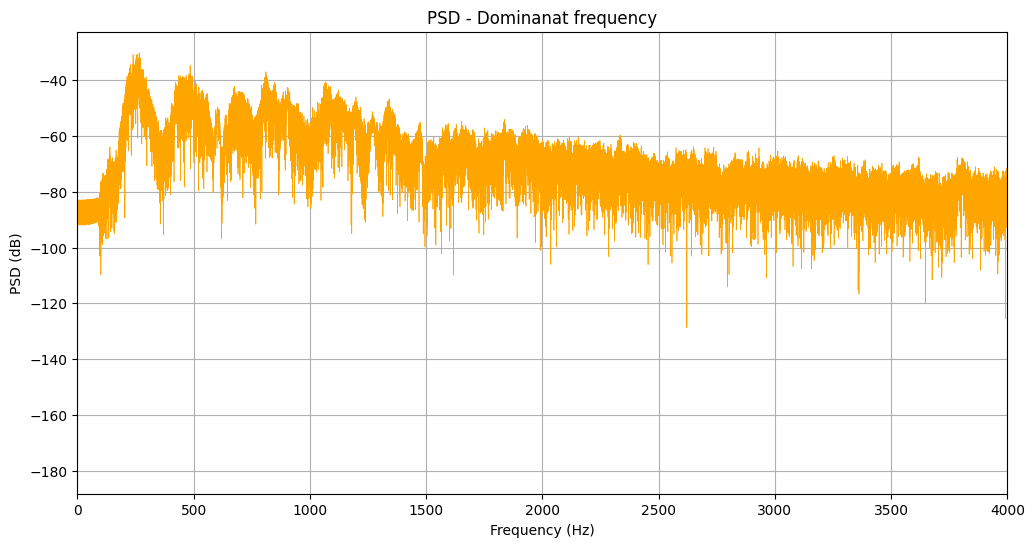

Dominant frequency: 265.90 Hz


In [104]:
#Analysis of dominant frequencies and forming frequencies
plt.figure(figsize=(12, 6))

#Plot del PSD: till frequencies of 4 kHz for Forming frequencies
plt.figure(figsize=(12, 6))
plt.plot(frequencies, psd_db, color='orange', linewidth=0.5)
plt.title("PSD - Dominanat frequency")
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (dB)')
plt.grid(True)
plt.xlim([0, 4000])
plt.show()

#Dominant frequency
freq_dominant = frequencies[np.where(psd == np.max(psd))]
print(f"Dominant frequency: {freq_dominant[0]:.2f} Hz")

3.2.2. The effect of different sampling frequencies on the resolution and quality of the periodogram.

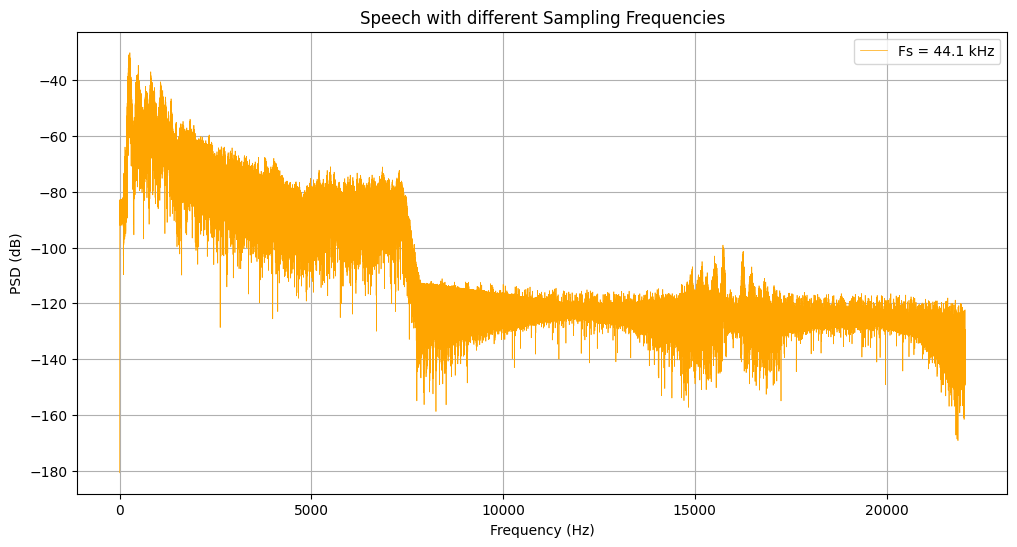

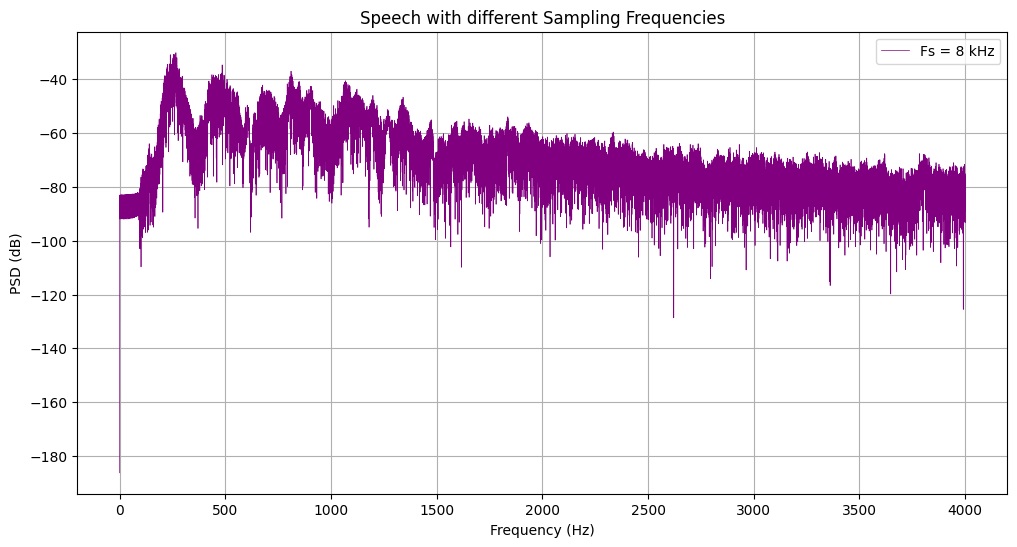

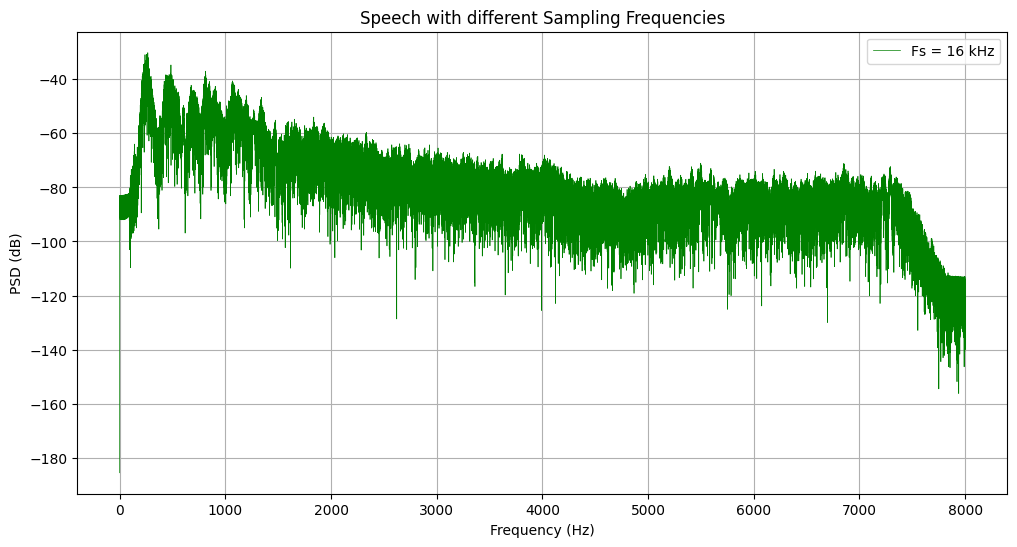

In [136]:
#Resample at 8 kHz and 16 kHz
my_speech_8k = resample(speech_signal, int(len(speech_signal) * 8000 / fs))
my_speech_16k = resample(speech_signal, int(len(speech_signal) * 16000 / fs))

#PSD for the new fs
freq_8k, psd_8k = periodogram(my_speech_8k, 8000)
freq_16k, psd_16k = periodogram(my_speech_16k, 16000)

#Conversions in decibel (dB)
psd_8k_db = 10 * np.log10(psd_8k)
psd_16k_db = 10 * np.log10(psd_16k)

#Plot
plt.figure(figsize=(12, 6))
plt.plot(frequencies, psd_db, label='Fs = 44.1 kHz', color='orange', linewidth=0.5)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (dB)')
plt.title('Speech with different Sampling Frequencies')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(freq_8k, psd_8k_db, label='Fs = 8 kHz', color='purple', linewidth=0.5)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (dB)')
plt.title('Speech with different Sampling Frequencies')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(freq_16k, psd_16k_db, label='Fs = 16 kHz', color='green', linewidth=0.5)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (dB)')
plt.title('Speech with different Sampling Frequencies')
plt.legend()
plt.grid(True)
plt.show()


3.2.3. The impact of varying window lengths on the frequency resolution.

C:\Users\sofyc\AppData\Local\Temp\ipykernel_25384\1375616841.py:11: RuntimeWarning: divide by zero encountered in log10
  psd_b_lengths = 10 * np.log10(psd_lengths)


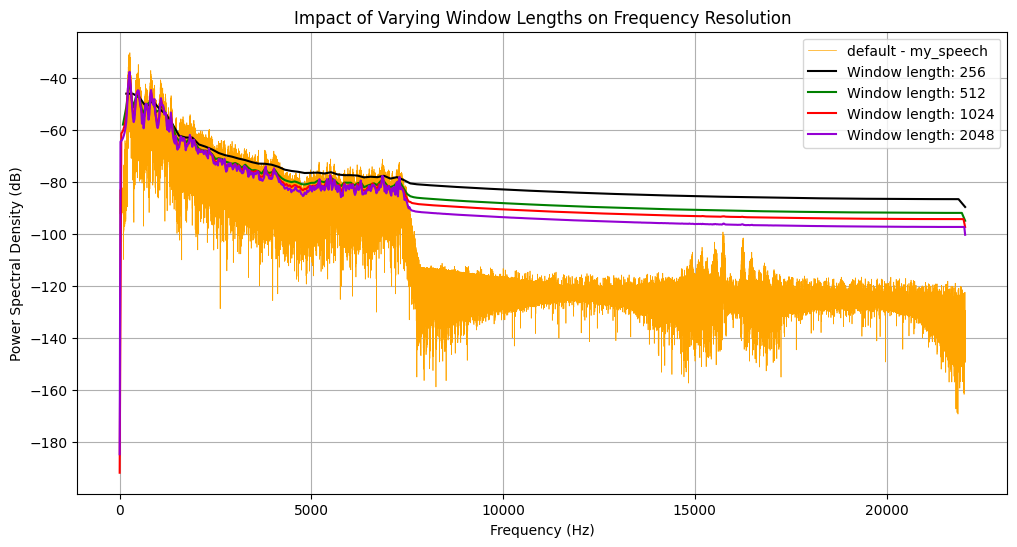

In [135]:
#Array with different window lengths on the frequency resolution
window_lengths = [256, 512, 1024, 2048]
windows = [get_window('boxcar', length) for length in window_lengths] #Default window
colors = ['black', 'green', 'red', 'darkviolet']

#Calculation and Plot of PSD with different windows with different lengths
plt.figure(figsize=(12, 6))
plt.plot(frequencies, psd_db, label='default - my_speech', color='orange', linewidth=0.5)
for w, l, c in zip(windows, window_lengths, colors):
    freq_lengths, psd_lengths = welch(speech_signal, fs, window='boxcar', nperseg=l)
    psd_b_lengths = 10 * np.log10(psd_lengths)
    plt.plot(freq_lengths, psd_b_lengths, label=f'Window length: {l}', linewidth=1.5, color=c)
#plt.xlim([0, 5000])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB)')
plt.title('Impact of Varying Window Lengths on Frequency Resolution')
plt.legend()
plt.grid()
plt.show()

### 4. Analysis and Interpretation: DA SCRIVERE